# 2a0 - Inspect data and create helper functions

# Imports and Setup

In [3]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# chuanxin
%cd "../gdrive/My Drive/cz4042_assignment_2/2a" 

Mounted at /gdrive
/gdrive/My Drive/cz4042_assignment_2/2a


In [4]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

In [5]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# Helper functions

### load_data(file)
Used to load in the data 

In [6]:
# Fixed, no need change
def load_data(file):
    with open(file, 'rb') as fo:
        try:
            samples = pickle.load(fo)
        except UnicodeDecodeError:  # python 3.x
            fo.seek(0)
            samples = pickle.load(fo, encoding='latin1')

    data, labels = samples['data'], samples['labels']

    data = np.array(data, dtype=np.float32) / 255
    labels = np.array(labels, dtype=np.int32)
    return data, labels

### plot_3_channel_img(np_array):

In [23]:
def plot_3_channel_img(np_array):
  titles = ['Original', 'Red channel', 'Green channel', 'Blue channel']
  cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

  fig, axes = plt.subplots(1, 4, figsize=(28,7))
  objs = zip(axes, (np_array, *np_array.transpose(2,0,1)), titles, cmaps)

  for ax, channel, title, cmap in objs:
      ax.imshow(channel, cmap=cmap)
      ax.set_title(title)
      ax.set_xticks(())
      ax.set_yticks(())

# 2a0 - Inspect the data

In [11]:
# Training and test
x_train, y_train = load_data('data_batch_1')
x_test, y_test = load_data('test_batch_trim')

In [12]:
a = x_train.reshape(10000, 32, 32, 3)

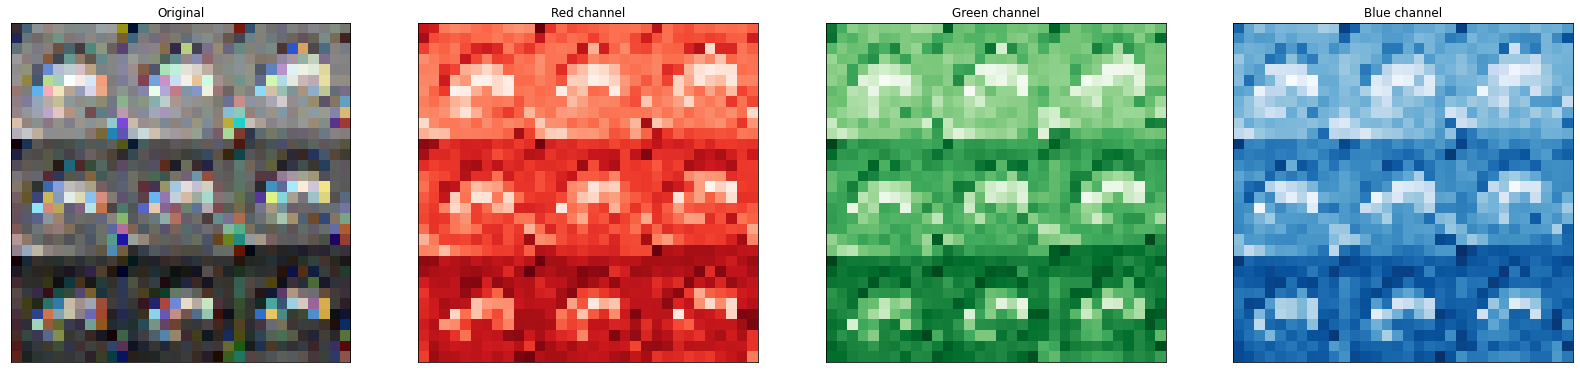

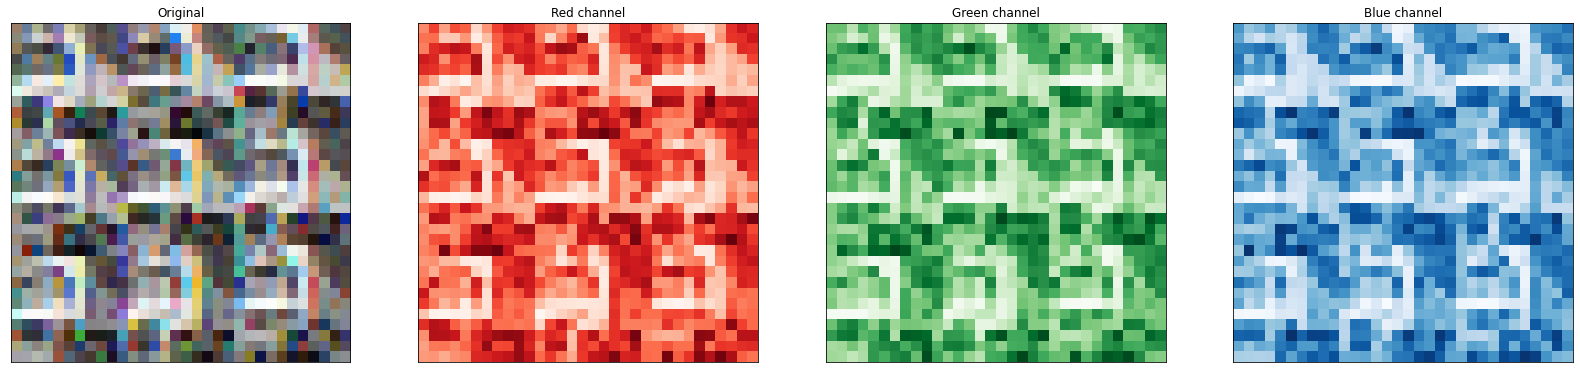

In [25]:
plot_3_channel_img(a[0])
plot_3_channel_img(a[1])

### make_model(num_ch_c1, num_ch_c2, use_dropout)
Creates a CNN model that has number of channels for the Conv2D layer specified, and also dropout, if needed

In [7]:
# def make_model(num_ch_c1, num_ch_c2, use_dropout):
#     ''' Note: This model is incomplete. You need to add suitable layers.
#     '''

#     model = tf.keras.Sequential()
#     model.add(layers.Input(shape=(3072, )))
#     model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
#     model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3)))
#     model.add(layers.Flatten())
#     model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))  # Here no softmax because we have combined it with the loss
#     return model